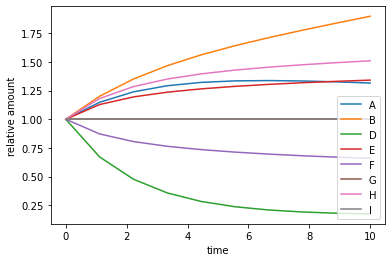

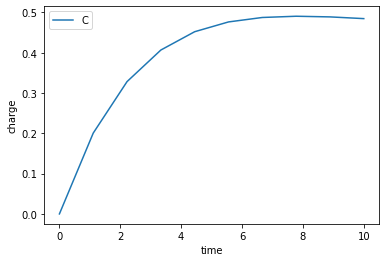

In [19]:
import numpy as np
import matplotlib.pyplot as plt
#number of reaction constants and variables 
n_r = 7
n_v = 9
np.random.seed(12)
k = 2*np.random.rand(n_r,)
x = np.ones(n_v,)
x[2]=0
a,b,c,d,e,f,g,h,i=x
dt = 0.1

flag = True
#calculate the steps
def calc_step(k,X,flag):
    a,b,c,d,e,f,g,h,i=X
    da=-k[0]*a*b*c+k[1]*d
    db=-k[0]*a*b*c+k[1]*d+k[2]*e
    if(flag):
        dc=-k[0]*a*b*c+k[1]*d+k[2]*e-k[3]*f*b*c
    else:
        dc=-k[0]*a*b*c+k[1]*d+k[2]*e-k[3]*f*b*c-k[6]*b*c*d
    dd=k[0]*a*b*c-k[1]*d+k[4]*e*h-k[5]*f*d
    de=k[3]*f*b*c-k[2]*e+k[5]*f*d-k[4]*e*h
    df= k[2]*e-k[3]*f*b*c+k[4]*e*h-k[5]*f*d
    dh=k[5]*f*d-k[4]*e*h
    #account for overcharge etc...
    if(not flag):
        dg=k[6]*b*c*d
        di=k[6]*b*c*d
        
    else:
        dg=0
        di=0
    return np.array([da,db,dc,dd,de,df,dg,dh,di])
X =np.array([a,b,c,d,e,f,g,h,i])
limit =10
res = []
res.append(X)

#approx next values
#for itr in range(limit-1):
 #   flag=True
  #  X = X+ calc_step(k,X,flag)*dt
   # res.append(X)
for itr in range(limit-1):
    flag=True
    X = X+ calc_step(k,X,flag)*dt
    res.append(X)
    
#print(np.array(res)[:,2])
res = np.array(res)
A=res[:,0]
B=res[:,1]
C=res[:,2]
D=res[:,3]
E=res[:,4]
F=res[:,5]
G=res[:,6]
H=res[:,7]
I=res[:,8]
t = np.linspace(0,10,limit)
plt.plot(t,A,label = "A")
plt.plot(t,B,label = "B")
plt.plot(t,D,label = "D")
plt.plot(t,E,label = "E")
plt.plot(t,F,label = "F")
plt.plot(t,G,label = "G")
plt.plot(t,H,label = "H")
plt.plot(t,I,label = "I")
plt.xlabel("time")
plt.ylabel("relative amount")
plt.legend()
plt.show()
plt.savefig("tester.jpg")
plt.plot(t,C,label = "C")
plt.xlabel("time")
plt.ylabel("charge")
plt.legend()
plt.show()